# Центральная предельная теорема своими руками

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt

    1. Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Выберем и определим очень интересное разложение: Бета-распределение. Применяеться оно в физике, вычислительных алгоритмах  и особенно в математической статистике. 

Определение: Бета-распределение в теории вероятностей и статистике — двухпараметрическое семейство абсолютно непрерывных распределений. Используется для описания случайных величин, значения которых ограничены конечным интервалом.

Пусть распределение случайной величины $ X $ задаётся плотностью вероятности $ f_{X} $ имеющей вид:
$$ f_{X}(x)={\frac {1}{\mathrm {B} (\alpha ,\beta )}}\,x^{\alpha -1}(1-x)^{\beta -1}, $$
где $ \alpha ,\beta >0 $ произвольные фиксированные параметры, и 
$ \mathrm {B} (\alpha ,\beta )=\int \limits _{0}^{1}x^{\alpha -1}(1-x)^{\beta -1}\,dx $ — бета-функция.
Тогда случайная величина $ X $ имеет бета-распределение. Пишут:
$ X\!\sim \mathrm {B} (\alpha ,\beta )$. 

Основные параметры распределения, ноебходимые нам в задании это математическое ожидание и дисперсия:
$$\mu = \frac{\alpha}{\alpha + \beta} $$ 

$$\sigma^2 = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta +1)} $$


    2. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

In [2]:
# все параметри теоретического распределения будем писать КАПСОМ
# параметры распределения
ALPHA = 0.7
BETA = 0.7

# бета распределения с параметрами альфа и бета, выборка размером в 1000 елементов 
beta = sts.beta(ALPHA,BETA) 
sample_beta = beta.rvs(1000)

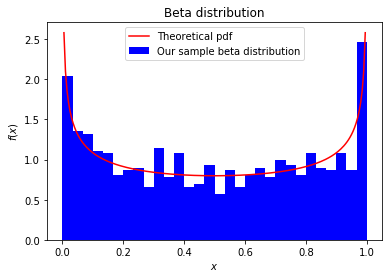

In [3]:
x = np.linspace(0, 1, 200) #генерим х рапределения
pdf = beta.pdf(x) # теоретическая плотность распределения

plt.plot(x, pdf, label='Theoretical pdf', c='r', alpha=1) # график теор. плотности
plt.hist(sample_beta, normed=True, bins = 30, color='blue', label='Our sample beta distribution') # гистограма сгенерированой выборки
plt.legend()
plt.title('Beta distribution')
plt.ylabel('$f (x)$')
plt.xlabel('$x$')
plt.show()


In [4]:
# матожидание, дисперсия и средне квадратичное отклонение нашего бета-распределения, парамеры альфа и бета заданы выше
MU = ALPHA/(ALPHA+BETA)
DISP = (ALPHA*BETA)/(((ALPHA+BETA)**2)*(ALPHA+BETA+1))
SIGMA = sqrt(DISP)
print(' матожидание =', MU, '\n', 'дисперсия =', DISP, '\n', 'ср. квадратическое отклонение =', SIGMA)

 матожидание = 0.5 
 дисперсия = 0.10416666666666669 
 ср. квадратическое отклонение = 0.32274861218395146


    3. Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.
    
    4. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки.
    
    5. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Для этих заданий напишем одну функцию, которую будем вызывать для каждого n (5, 10, 50). Она будет генерировать выборки, считать параметры нормального распределения по ЦПТ, строить доверительный интервал, рисовать гистограмки и плотности распределения Гаусса. Подсмотрел этот способ сокращения кода у Глеба Михайлова (http://glebmikhaylov.com), но как по мне генерацию выборок можно упростить, получилось довольно элегантно как по мне.

In [15]:
def clt(n):
    means = [] # массив для средних каждой из 1000 выборок
    for i in range(1000):
        sub_sample = beta.rvs(n) # генерируем выбокру из n чисел, и делаем цикл на 1000 раз
        means.append(np.mean(sub_sample)) # усредняем выборку из n чисел и записываем в массив для средних
        
    mu = np.mean(means) # матожидание усредненной выборки
    sigma = np.std(means,ddof=1) # стандартное отклонение (среднеквадратическое) для наших выборок
    standart_error = SIGMA/sqrt(n) # стандартная ошибка среднего
    
    norm_rv = sts.norm(MU, standart_error) # Нормальное распределение по ЦПТ
    
    print('Теоретическое среднее vs приближенное: {:.5f} vs {:.5f}'.format(MU, mu))
    print('Теоретическое стандартное откл. vs приближенное: {:.5f} vs {:.5f}'.format(standart_error, sigma))
    print('95% доверительный интервал = {:.5f} +/- {:.5f}'.format(mu, 2*standart_error))

    plt.hist(means, normed=True, label='Sample means \n distribution')
    plt.plot(x, norm_rv.pdf(x), label='Normal distribution \n for CLT')
    plt.legend(loc=2)
    plt.title('CLT in action')
    plt.ylabel('$f (x)$')
    plt.xlabel('$x$')
    plt.show()

Вызовем нашу функцию для n = 5, 10 и 50.

Теоретическое среднее vs приближенное: 0.50000 vs 0.49858
Теоретическое стандартное откл. vs приближенное: 0.14434 vs 0.14768
95% доверительный интервал = 0.49858 +/- 0.28868


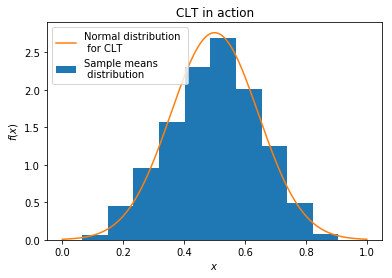

In [16]:
clt(5)

Теоретическое среднее vs приближенное: 0.50000 vs 0.49815
Теоретическое стандартное откл. vs приближенное: 0.10206 vs 0.10623
95% доверительный интервал = 0.49815 +/- 0.20412


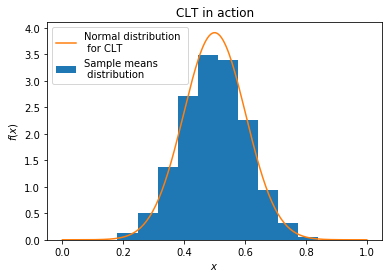

In [17]:
clt(10)

Теоретическое среднее vs приближенное: 0.50000 vs 0.49804
Теоретическое стандартное откл. vs приближенное: 0.04564 vs 0.04602
95% доверительный интервал = 0.49804 +/- 0.09129


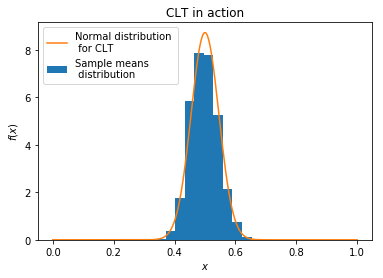

In [18]:
clt(50)

## Выводы
Для выполнения задания была выбрана функция Бета-распределения. Проделаны все необходимые действия для доказания ЦПТ.
Как видим с графиков и расчетов ЦПТ работает. При увеличени размера выборки основные параметры распределения "улучшаются": среднее приближаеться к теоретическому, доверительный интервал уменшаесться, отклонение также уменьшаеться. 

Почему так? Ну пару причин: 
1. ЦПТ работает.
2. Бета распределения легко приблизить к нормальному "играя" параметрами (попробуйде увеличить альфа и бета до 10 к примеру)
3. Так же при равных параметрах распределения альфа и бета, выборка довольно симетрична (1й график).

Но что будет если сделать параметры сильно не симетричными? Попробуйте сами, в этом блокноте Вам просто стоит поменять альфа и бета в начале кода, все все равно будет работать. Вы увидете что останется не симеметричность распределения, но несмотря на это ЦПТ будет прекрасно работать, среднее и отклониние будут довольно точны, а доверительный интревал узким.